In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('/content/drive/MyDrive/PCA/train.csv')

In [3]:
df.shape

(42000, 785)

In [4]:
df.sample()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
23673,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


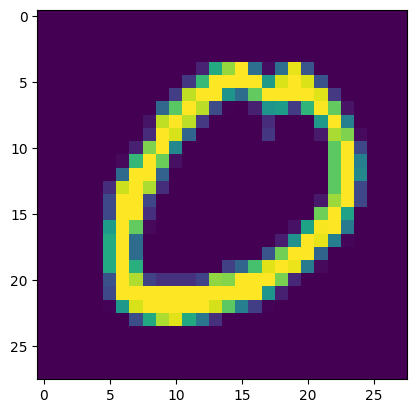

In [5]:
plt.imshow(df.iloc[13051,1:].values.reshape(28,28))

In [6]:
X=df.iloc[:,1:]
y=df.iloc[:,0]

In [7]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [8]:
X_train.shape

(33600, 784)

In [9]:
from sklearn.neighbors import KNeighborsClassifier


In [10]:
knn=KNeighborsClassifier()

In [11]:
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [13]:
import time
start=time.time()
y_pred=knn.predict(X_test)
print(time.time() - start)

31.32791781425476


In [15]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9648809523809524

In [16]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [17]:
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [18]:
#PCA 
from sklearn.decomposition import PCA
pca=PCA(n_components=200)

In [23]:
X_train_tf=pca.fit_transform(X_train)
X_test_tf=pca.transform(X_test)

In [24]:
X_train_tf.shape

(33600, 200)

In [25]:
knn=KNeighborsClassifier()

In [26]:
knn.fit(X_train_tf,y_train)

KNeighborsClassifier()

In [27]:
y_pred=knn.predict(X_test_tf)

In [28]:
accuracy_score(y_test,y_pred)

0.9507142857142857

In [30]:
for i in range(1,785):
  pca=PCA(n_components=i)
  X_train_tf=pca.fit_transform(X_train)
  X_test_tf=pca.transform(X_test)
  knn=KNeighborsClassifier()
  knn.fit(X_train_tf,y_train)
  y_pred=knn.predict(X_test_tf)
  print(accuracy_score(y_test,y_pred))

0.25797619047619047
0.32357142857142857
0.5103571428571428
0.6660714285714285
0.7378571428571429
0.8226190476190476
0.8429761904761904
0.871904761904762
0.886547619047619
0.9063095238095238
0.9110714285714285
0.9179761904761905
0.929047619047619
0.935
0.9373809523809524
0.9377380952380953
0.9404761904761905
0.9397619047619048
0.9429761904761905
0.9436904761904762
0.9432142857142857
0.9446428571428571
0.944047619047619
0.945595238095238
0.9464285714285714
0.9479761904761905
0.9476190476190476
0.9473809523809524
0.9492857142857143
0.9501190476190476
0.9510714285714286
0.9513095238095238
0.9501190476190476
0.9503571428571429
0.9515476190476191
0.9533333333333334
0.9530952380952381
0.9534523809523809
0.9533333333333334
0.9526190476190476
0.9520238095238095
0.9526190476190476
0.9529761904761904
0.9526190476190476


KeyboardInterrupt: ignored

In [32]:
#transforming t a 2D corrdinate system
pca=PCA(n_components=2)
X_train_tf=pca.fit_transform(X_train)
X_test_tf=pca.transform(X_test)

In [33]:
X_train_tf

array([[-2.71864101, -0.4895812 ],
       [-0.67695299, -6.75377446],
       [-3.03325436,  6.50990757],
       ...,
       [ 2.14885173,  0.78072803],
       [ 1.05957578,  0.94767688],
       [17.70261313,  1.96140866]])

In [37]:
import plotly.express as px
y_train_tf=y_train.astype(str)
fig=px.scatter(x=X_train_tf[:,0],y=X_train_tf[:,1],color=y_train_tf,color_discrete_sequence=px.colors.qualitative.G10)
fig.show()

In [38]:
#transforming in 3D
pca=PCA(n_components=3)
X_train_tf=pca.fit_transform(X_train)
X_test_tf=pca.transform(X_test)

In [39]:
X_train_tf

array([[-2.71863138, -0.49011975,  1.13557166],
       [-0.67696761, -6.75427486, -2.33603294],
       [-3.03323138,  6.51006084,  7.49200861],
       ...,
       [ 2.14884137,  0.78044945, -0.74754836],
       [ 1.05956489,  0.94763512,  3.94996759],
       [17.7026146 ,  1.96141998, -4.94314344]])

In [41]:
import plotly.express as px
y_train_tf=y_train.astype(str)
fig=px.scatter_3d(df,x=X_train_tf[:,0],y=X_train_tf[:,1], z=X_train_tf[:,2],color=y_train_tf)
fig.update_layout(margin=dict(l=20,r=20,t=20,b=20),paper_bgcolor="LightSteelBlue",)
fig.show()

In [42]:
pca.explained_variance_
#Eigen value

array([40.67111198, 29.17023384, 26.7445961 ])

In [43]:
pca.explained_variance_ratio_

array([0.05785192, 0.0414927 , 0.03804239])

In [44]:
pca=PCA(n_components=None)
X_train_tf=pca.fit_transform(X_train)
X_test_tf=pca.transform(X_test)

In [45]:
pca.explained_variance_.shape

(784,)

In [46]:
np.cumsum(pca.explained_variance_ratio_)

array([0.05785192, 0.09934462, 0.13738701, 0.16704964, 0.19286525,
       0.21541506, 0.23514574, 0.25289854, 0.26858504, 0.28294568,
       0.29664822, 0.30892077, 0.32038989, 0.33162017, 0.34220546,
       0.35240477, 0.36198153, 0.37140862, 0.38053351, 0.38943521,
       0.39783462, 0.40603525, 0.41388828, 0.42145568, 0.42882829,
       0.43584714, 0.44282633, 0.44953738, 0.45593583, 0.4622392 ,
       0.46839271, 0.4744166 , 0.48025334, 0.48603881, 0.49176214,
       0.49722614, 0.50265822, 0.50793994, 0.51307376, 0.51801392,
       0.52289063, 0.52771041, 0.53239246, 0.53698588, 0.54156249,
       0.54605468, 0.5505015 , 0.55491691, 0.55926803, 0.56358836,
       0.56780645, 0.57198888, 0.57606882, 0.58008887, 0.58407223,
       0.58801822, 0.59188694, 0.59571889, 0.59948441, 0.60322635,
       0.60687487, 0.6104829 , 0.61402176, 0.61750117, 0.62094441,
       0.62432378, 0.62767368, 0.63099377, 0.63426257, 0.63746765,
       0.64065542, 0.64376931, 0.64686564, 0.64992395, 0.65296

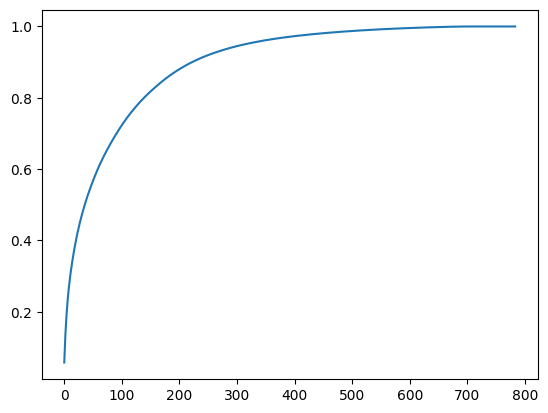

In [47]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))